## Kaggle Titanic

to dos:
- fam number into classification (not values but columns)
- categorize the ages in 3-4 kategories

In [37]:
# Importing the libraries
import numpy as np
#import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm
import seaborn as sns

dataset1.head()

dataset1.columns

In [38]:
#dataset2.head()

dataset.head()
dataset.columns

In [39]:
# Importing the dataset
dataset = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/train.csv')
dataset1 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')

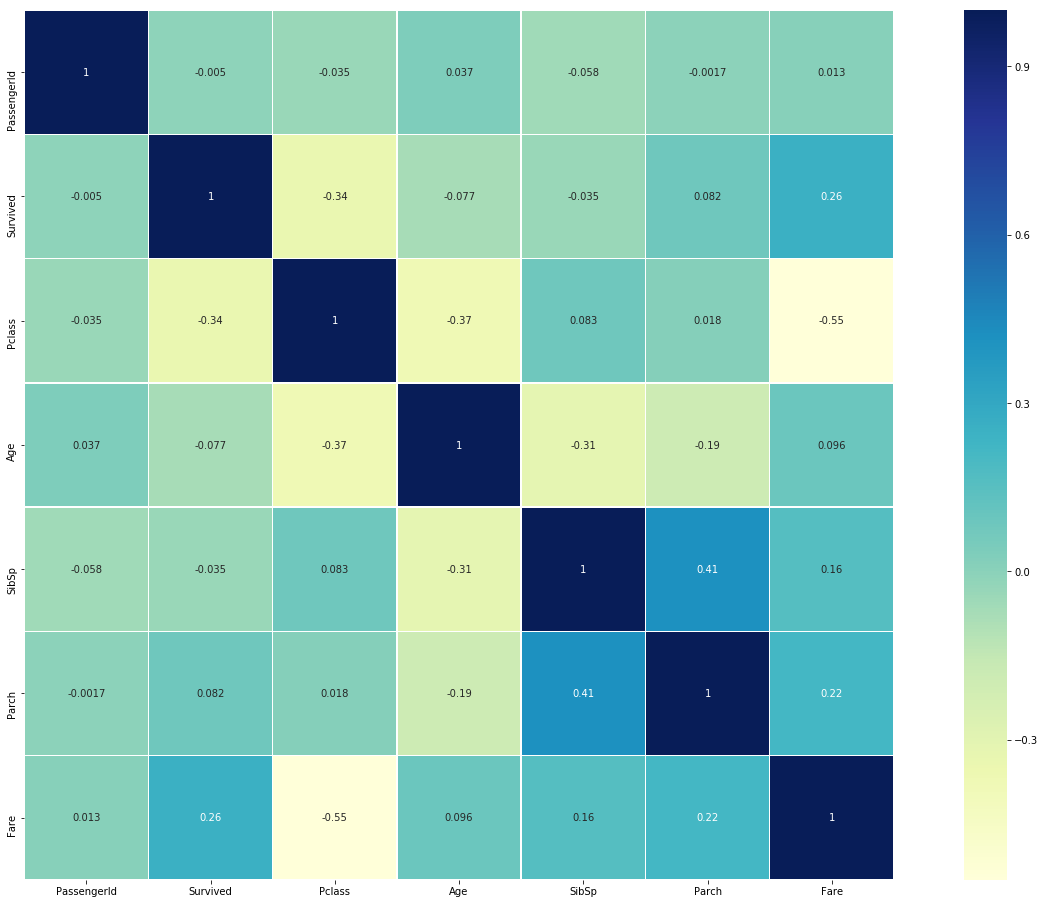

In [40]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(dataset.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

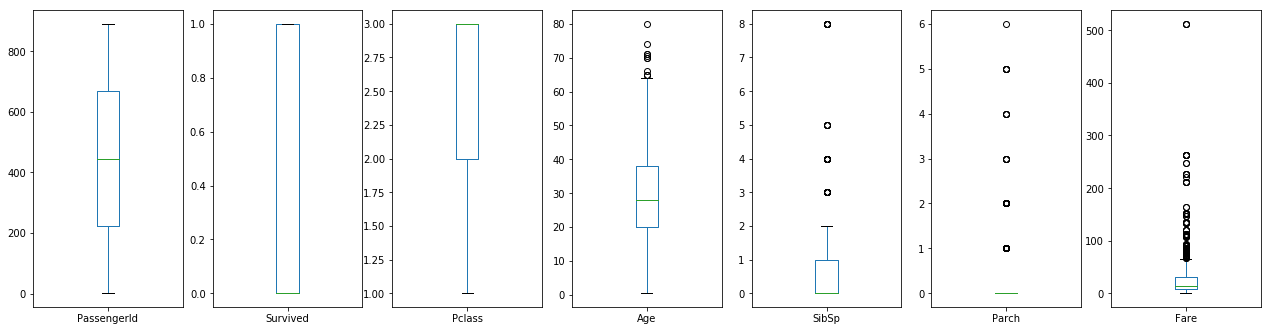

In [41]:
dataset.plot(kind='box', subplots=True, layout=(2,7), sharex=False, sharey=False,figsize=[22,12])
plt.show()

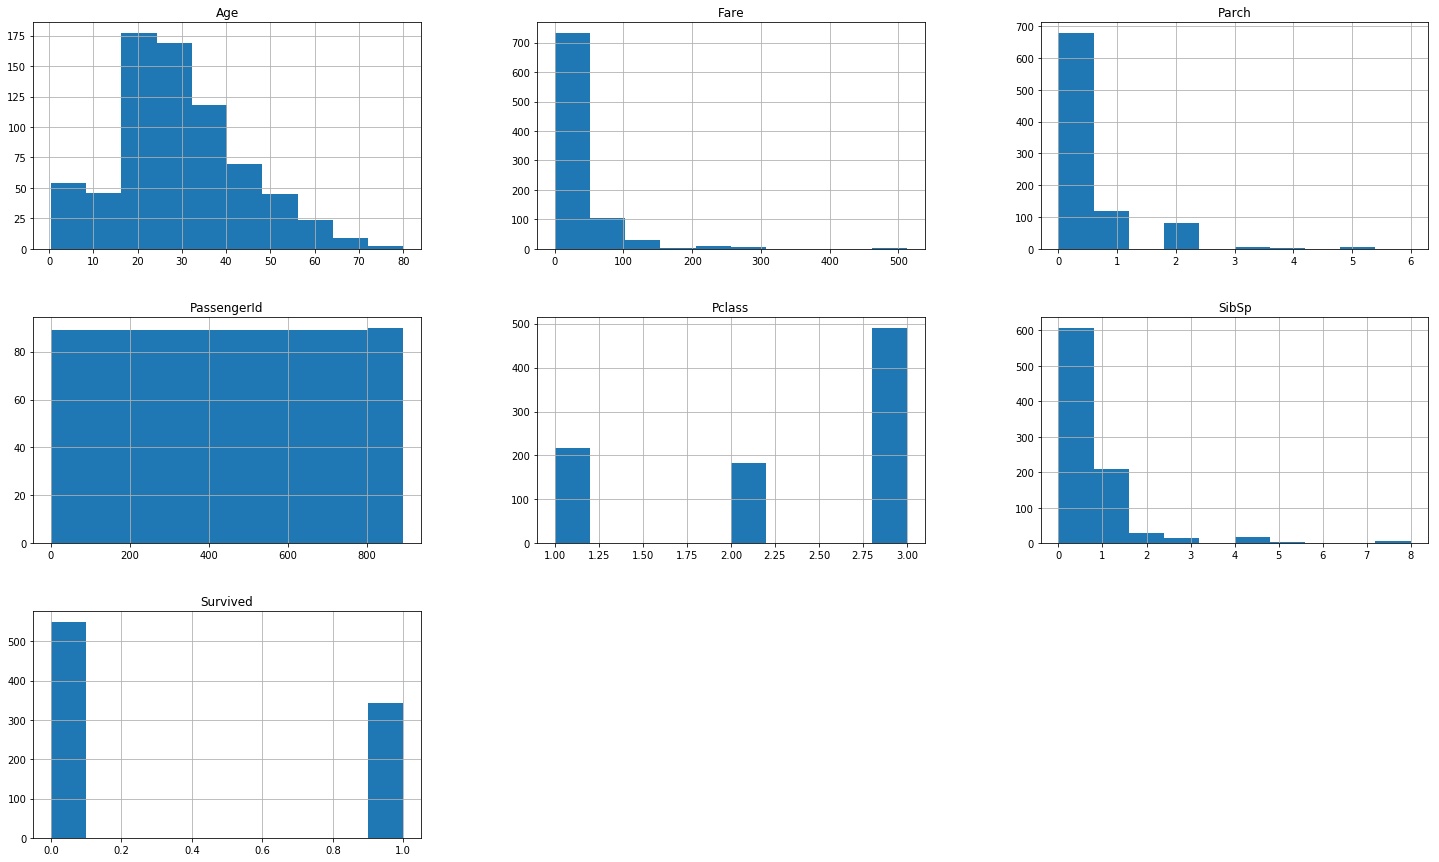

In [42]:
dataset.hist(figsize=[25,15])
plt.show()

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is

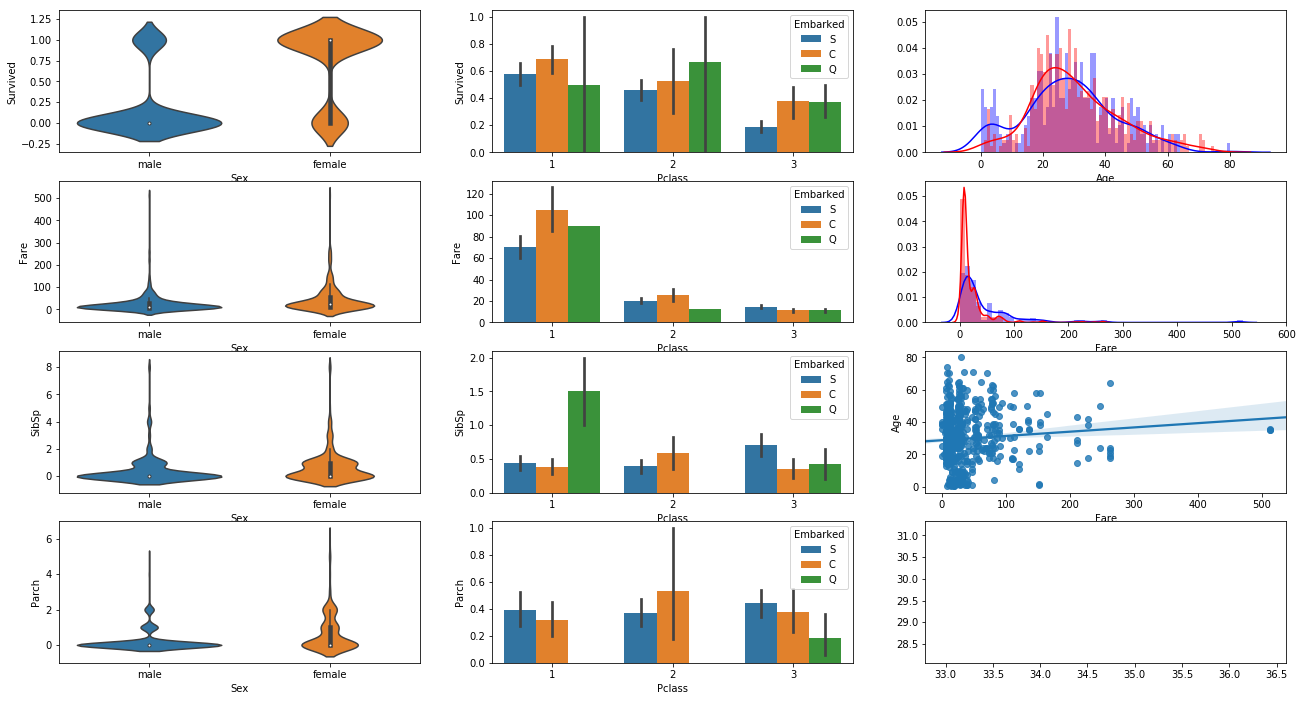

In [43]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
sns.violinplot(x = 'Sex', y = 'Survived', data = dataset,ax = ax[0,0])
sns.barplot(x = 'Pclass',y ='Survived',data = dataset,hue = 'Embarked',ax = ax[0,1])
sns.distplot(dataset[dataset['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(dataset[dataset['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
sns.violinplot(x = 'Sex', y = 'Fare', data = dataset,ax = ax[1,0])
sns.barplot(x ='Pclass', y = 'Fare',data = dataset , hue = 'Embarked', ax = ax[1,1])
sns.distplot(dataset[dataset['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(dataset[dataset['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])
sns.violinplot(x = 'Sex', y ='SibSp',data = dataset,ax = ax[2,0])
sns.barplot(x= 'Pclass', y = 'SibSp', data = dataset, hue = 'Embarked', ax = ax[2,1])
sns.regplot(x = 'Fare', y = 'Age', data = dataset, ax = ax[2,2])
sns.violinplot(x = 'Sex', y = 'Parch', data = dataset, ax = ax[3,0])
sns.barplot(x = 'Pclass', y = 'Parch', data = dataset, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)

In [44]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_train = dataset[['Survived']].values

In [46]:
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset[['SibSp','Parch','Age']])
dataset[['SibSp','Parch','Age']] = imputer.transform(dataset[['SibSp','Parch','Age']])

imputer = Imputer(missing_values="NaN",strategy="mean",axis=0)
imputer = imputer.fit(dataset1[['SibSp','Parch','Age']])
dataset1[['SibSp','Parch','Age']] = imputer.transform(dataset1[['SibSp','Parch','Age']])

In [47]:
'''DATA PREPERATION-MANIPULATION'''
dataset['Cabin'] = dataset['Cabin'].replace(regex={r'[^NaN]': 1})
dataset1['Cabin'] = dataset1['Cabin'].replace(regex={r'[^NaN]': 1})

dataset['Fam_num'] = dataset['SibSp'] + dataset['Parch']
dataset1['Fam_num'] = dataset1['SibSp'] + dataset1['Parch']
#print (dataset.values[:,12])

In [48]:
#dataset['Fam_num'] = np.where(dataset['Fam_num'].between(0,1), 1, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(2,3), 2, dataset['Fam_num'])
#dataset['Fam_num'] = np.where(dataset['Fam_num'].between(4,5), 3, dataset['Fam_num'])
dataset['Fam_num'] = np.where(dataset['Fam_num'].between(4,20), 3, dataset['Fam_num'])

#dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(0,1), 1, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(2,3), 2, dataset1['Fam_num'])
#dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(4,5), 3, dataset1['Fam_num'])
dataset1['Fam_num'] = np.where(dataset1['Fam_num'].between(4,20), 3, dataset1['Fam_num'])

In [49]:
'''AGE IN CATEGORIES'''
dataset['Age'] = np.where(dataset['Age'].between(0,12), 1, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(13,30), 2, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(30,50), 3, dataset['Age'])
dataset['Age'] = np.where(dataset['Age'].between(50,100), 4, dataset['Age'])


dataset1['Age'] = np.where(dataset1['Age'].between(0,12), 1, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(13,30), 2, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(30,50), 3, dataset1['Age'])
dataset1['Age'] = np.where(dataset1['Age'].between(50,100), 4, dataset1['Age'])

In [50]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Pclass'], prefix='Pclass', drop_first=True)], axis=1)
dataset.drop(['Pclass'],axis=1, inplace=True)
dataset1.drop(['Pclass'],axis=1, inplace=True)

dataset = pd.concat([dataset,pd.get_dummies(dataset['Age'], prefix='Age', drop_first=True)], axis=1)
dataset1 = pd.concat([dataset1,pd.get_dummies(dataset1['Age'], prefix='Age', drop_first=True)], axis=1)
dataset.drop(['Age'],axis=1, inplace=True)
dataset1.drop(['Age'],axis=1, inplace=True)

In [51]:
'''DATA PREPERATION-MANIPULATION'''
values = {'Sex': 1, 'Cabin': 0}
X_train = dataset.fillna(value=values)
X_test = dataset1.fillna(value=values)

In [52]:
X_train = X_train.replace(['female','male'],[0,1])
X_test = X_test.replace(['female','male'],[0,1])

In [53]:
X_train= X_train[['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']]
X_test= X_test[['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']]

In [54]:
X_train

,Sex,Cabin,Fam_num,Pclass_2,Pclass_3,Age_2.0,Age_3.0,Age_4.0
0,1,0.0,1.0,0,1,1,0,0
1,0,1.0,1.0,0,0,0,1,0
2,0,0.0,0.0,0,1,1,0,0
3,0,1.0,1.0,0,0,0,1,0
4,1,0.0,0.0,0,1,0,1,0
5,1,0.0,0.0,0,1,1,0,0
6,1,1.0,0.0,0,0,0,0,1
7,1,0.0,3.0,0,1,0,0,0
8,0,0.0,2.0,0,1,1,0,0
9,0,0.0,1.0,1,0,1,0,0


In [55]:
#np.count_nonzero(np.isnan(X_train))
# performing standard scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)

In [56]:
np.count_nonzero(np.isnan(X_train))

0

#### Classification 

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 
from sklearn.linear_model import LinearRegression

In [26]:
clf_rf = RandomForestClassifier(criterion='gini', 
                             n_estimators=200,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC(C=1.0, cache_size=100, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
#clf_regressor = LinearRegression()
#trainnig the model
#regressor.fit(X_train, y_train)
#predicting the model on test data ste
#y_pred = regressor.predict(X_test)

In [27]:
Classifiers = ['RandomForest','ExtraTrees','Bagging','AdaBoost','DecisionTree','XGBoost','LogisticRegression','SVM']
scores = []
models = [clf_rf, clf_et, clf_bc, clf_ada, clf_dt, clf_xg, clf_lr, clf_svm]
for model in models:
    score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [28]:
#need to get rid of 7 + need to add one hot to the Cabin info
#importing model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score

#maiing object
regressor = LinearRegression()
#trainnig the model
mean_regression = []
for i in range(5):
    X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size = 0.2, random_state = i)
    regressor.fit(X_train_split, y_train_split)
    #predicting the model on test data ste
    y_pred_split = regressor.predict(X_test_split)
    y_pred_split = y_pred_split > 0.5
    # confusion matrix
    #from sklearn.metrics import confusion_matrix
    #cm = confusion_matrix(y_test_split, y_pred_split)
    #print(cm)
    #print(accuracy_score(y_pred, y_test))
    mean_regression.append(accuracy_score(y_pred_split, y_test_split))

C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
meanscore = np.array(mean_regression).mean()
Classifiers.append('Linear Regression')
scores.append(meanscore)

In [30]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [31]:
mode

,score
SVM,0.832768
XGBoost,0.827162
ExtraTrees,0.815938
RandomForest,0.814814
DecisionTree,0.813703
Bagging,0.813691
AdaBoost,0.809209
Linear Regression,0.800000
LogisticRegression,0.795687


	score
XGBoost	0.831618
SVM	0.820458
Bagging	0.814915
DecisionTree	0.813791
AdaBoost	0.809171
RandomForest	0.807061
LogisticRegression	0.805813
ExtraTrees	0.800357
Linear Regression	0.781650

In [58]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [59]:
def grid(model,parameters,X_train,y_train):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(X_train,np.ravel(y_train))
    return grid.best_score_, grid.best_estimator_.get_params()

In [60]:
def imp_features(model, model_name, params,X_train,y_train):
    Model = model(**params)
    Model.fit(X_train,y_train)
    names = ['Sex', 'Cabin','Fam_num', 'Pclass_2', 'Pclass_3',
       'Age_2.0', 'Age_3.0', 'Age_4.0']
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [61]:
%%capture
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg,X_train,y_train)
#imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

In [62]:
print(best_score_xg)

0.8260381593714927


In [69]:
%%capture
best_score_rf, best_params_rf = grid(clf_rf, parameters_rf,X_train,y_train)
#imp_features(RandomForestClassifier,'Random Forest',np.ravel(parameters_rf))

KeyboardInterrupt: 

In [70]:
print(best_score_rf)

NameError: name 'best_score_rf' is not defined

In [63]:
%%capture
best_score_svm, best_params_svm = grid(clf_svm, parameters_svm,X_train,y_train)

In [64]:
print(best_score_svm)

0.8316498316498316


In [65]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

In [74]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components =  2).fit_transform(X_test)

Text(0.5,1,'Support Vector Machines')

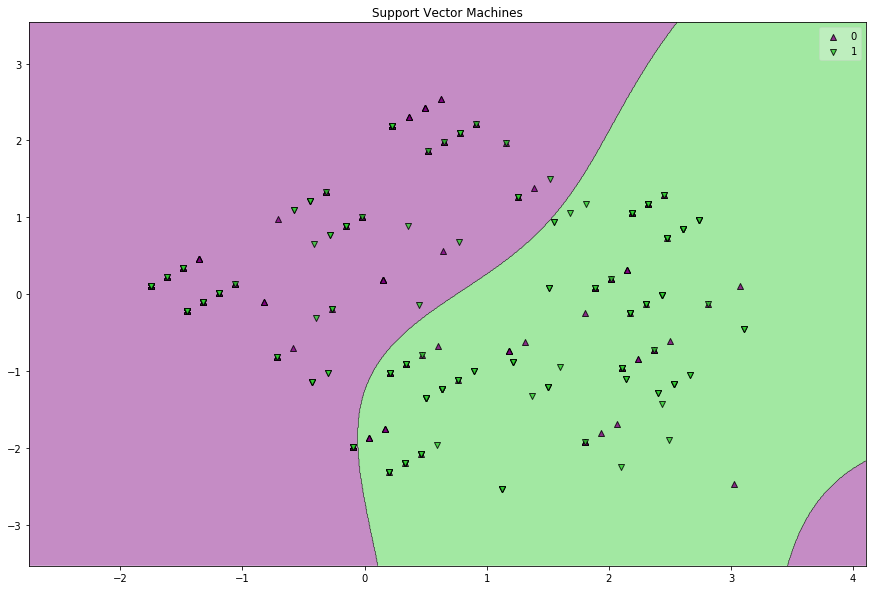

In [75]:
from mlxtend.plotting import plot_decision_regions
t = np.array(y_train)
t = np.ravel(t.astype(np.integer))
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train_reduced,t)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = clf_svm, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [77]:
clf_svm = SVC(**best_params_svm)
clf_svm.fit(X_train,y_train)
dataset2 = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv')
#testdf = testdf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
#                  'Age','Fare','Family','Alone'],axis = 1)
#nptest = np.array(testdf)
pred = clf_svm.predict(X_test)
predictions = pd.DataFrame(pred, columns = ['Survived'])
predictions.to_csv('predictions_svm_with_groups.csv')


C:\Users\gavam\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [78]:
predictions

,Survived
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,0
8,1
9,0


In [82]:
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
accuracy_score(predictions.values, y_test[:,1])

0.8947368421052632

In [337]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

NameError: name 'X' is not defined

In [ ]:
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components =  2).fit_transform(X_test)

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
y_train= dataset.iloc[:,1].values

In [ ]:
# performng PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components = 7)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

In [ ]:
from mlxtend.plotting import plot_decision_regions
t = y_train.astype(np.integer)
#clf_svm = SVC(**best_params_svm)
#clf_svm.fit(X_train_reduced,t)
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_reduced, t)
y_pred = classifier.predict(X_test_reduced)
plt.figure(figsize = [15,10])
plot_decision_regions(X_train_reduced, t, clf = classifier, hide_spines = False, colors = 'purple,limegreen',
                      markers = ['^','v'])
plt.title('Support Vector Machines')

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

In [ ]:
from xgboost import XGBClassifier, plot_importance 

classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

## Data Dictionary
#### VariableDefinitionKey: 
- survival Survival 0 = No, 1 = Yes pclass Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd 
- sex Sex Age Age in years sibsp # of siblings / spouses aboard the Titanic
- parch # of parents / children aboard the Titanic ticket Ticket number fare Passenger fare cabin Cabin number 
- embarked Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton

#### Variable Notes

- pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

- age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

- sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

- parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
?str.replace()



In [ ]:
#what we need
dataset.columns

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X1 = dataset.iloc[:,0]
X2 = dataset.iloc[:, 2:]
X = pd.concat([X1,X2], axis=1)
X = X.replace(['female','male'],[0,1])#.values
#y = y.replace(['NaN',],[0,1])
X['Cabin'] = X['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X['Pclass'].mean(),  'SibSp' : X['SibSp'].mean(), 'Parch' : X['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X = X.fillna(value=values)
X = X.round(1)
X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']] = X[['Pclass','Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)
print ('The shape is',X.shape)
X = X[['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']].values
y = dataset.iloc[:, 1].values

In [ ]:
# Class vs Survived
print(dataset[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# sex vs Survived
print(dataset[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# SibSp vs Survived
#Sibling = brother, sister, stepbrother, stepsister
#Spouse = husband, wife (mistresses and fiancés were ignored)
print(dataset[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
# Parch vs Survived
#Parent = mother, father
#Child = daughter, son, stepdaughter, stepson
#Some children travelled only with a nanny, therefore parch=0 for them.
print(dataset[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False))

In [ ]:
X

In [ ]:
import statsmodels.formula.api as sm
X = np.append(np.ones((891,1)).astype(int),X,axis=1)
X

In [ ]:
X_opt = X[:,[0,1,2,3,4,5]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

In [ ]:
'''DATA MANIPULATION (TRAIN)'''
X_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/test.csv')
X_test = X_test.replace(['female','male'],[0,1])
X_test['Cabin'] = X_test['Cabin'].replace(regex={r'[^NaN]': 1})
values = {'PassengerId': 'NoID', 'Pclass': X_test['Pclass'].mean(), 'Name': 'NoName', 'Sex': 1,
          'Age': X_test['Pclass'].mean(),  'SibSp' : X_test['SibSp'].mean(), 'Parch' : X_test['Parch'].mean(),
          'Ticket':'NoTicket', 'Fare':'NoFare', 'Cabin': 0, 'Embarked':'NoEmbarkedInfo' }
X_test = X_test.fillna(value=values)
X_test = X_test.round(1)
X_test[['Sex','Age','Pclass','SibSp','Cabin']] = X_test[['Sex','Age','Pclass','SibSp','Cabin']].apply(np.int64)

In [ ]:
#['Pclass', 'Sex', 'Age', 'SibSp', 'Cabin']
X_train = X
y_train = y
X_test = X_test[['Pclass','Sex','Age','SibSp','Cabin']].values
y_test = pd.read_csv('C:/Users/gavam/Desktop/ml_BookLab/Titanic/titanic_data/gender_submission.csv').values
y_test = y_test[:,1]

In [ ]:
X_test.shape

In [ ]:
X_train.shape

In [ ]:
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
 
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred.min()
y_pred.max()

In [ ]:
#Normalized Data
normalized = np.array((y_pred-min(y_pred))/(max(y_pred)-min(y_pred)))

In [ ]:
normalized[normalized > 0.5] = 1
normalized[normalized <= 0.5] = 0

In [ ]:
normalized

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(normalized, y_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, normalized)
cm

### Tree

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
y_pred

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
#classifier = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
classifier = RandomForestClassifier(criterion='gini', 
                             n_estimators=1000,
                             min_samples_split=10,
                             min_samples_leaf=1,
                             max_features='auto',
                             oob_score=True,
                             random_state=1,
                             n_jobs=-1)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

### SVM

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)